# LG2dAOHighl test notebook
Dieses Notebook dient als Test für die Klassen
 * LdftModel
 * Ldft2dMf
 
Es kann aber auch als kleines Tutorial für diese Klassen betrachtet werden. Zu jeder aufgerufenen funktion kann übrigens die Hilfe aufgerufen werden. Z.B.: `help(LG2dMf.create_init_profile)`

Lade zunächst benötigte Packages

In [1]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
import scipy.optimize as op
import math
import os
from os import path
from ldft_classes_v2.lg_2d_mf import LG2dMf

Mache die Plot's hübsch

In [2]:
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
rcParams.update({'figure.autolayout': True})

In [3]:
Model=LG2dMf

# Klassenbeschreibung

In [4]:
help(Model)

Help on class LG2dMf in module ldft_classes_v2.lg_2d_mf:

class LG2dMf(ldft_classes_v2.ldft_model.LdftModel)
 |  LG2dMf(size, epsi, mu_fix=False, mu=None, dens=None, v_ext=None, bound_cond='periodic', r=None, r_hist=None, err_hist=None, it_hist=None)
 |  
 |  This class describes a single component lattice gas in 2d with
 |  sticky next neighbour attractions on a simple cubic lattice. The
 |  description is done within the framework of meanfield theory. The
 |  class inheritates from the interface-class ``LdftModel``.
 |  
 |  Parameters
 |  ----------
 |  size : `tuple` of `int`
 |      Shape of the systems simulation box. Expects a `Tuple` of two
 |      integers, each for one dimensional axis.
 |  epsi : `float`
 |      Attraction strength (multiplied with the inverse temperature to
 |      make it's dimension 1)
 |  mu_fix : `bool`, optional: default = False
 |      Determines whether or not the system is treated canonical or
 |      grand canonical. ``False`` for canonical.
 |  mu

# Teste zunächst die \__init__-Methode :

In [5]:
size = (20, 40)
epsi = 2
dens = 0.3
model = Model(size, epsi=epsi, dens=dens, bound_cond="11_if")
print(model)

This is a Lattice gas described with mean fieldDFT. It is an object of the Type 'LG2dMF' and hasthe following properties:

Attr. strength 'epsi'                   : 2

It inherits from 'LdftModel', with thefollowing properties:
This is a LdftModel with the following properties:

Systemsize                              : (20, 40)
mu_fix                                  : [False]
Chem. pot. 'mu'                         : [None]
Density                                 : [0.3]
External potential 'V_ext'              : off
Curent dens prof                        : <class 'NoneType'>
History                                 : len=0
                                        : last entry=---
Error history                           : len=0
                                        : last value=---
Boundary Condition                      : 11_if



# Teste die Methoden zur erzeugung eines initialen Dichteprofiels

Mittlere Teilchendichte:   0.3000000000000001


/home/manuel/miniconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


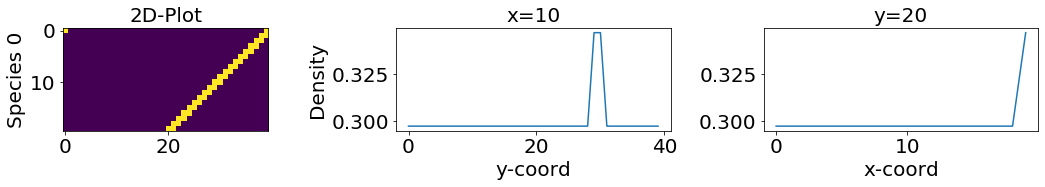

In [6]:
model.create_init_profile(dens=[0.3], shape=[(20,2)])
print('Mittlere Teilchendichte: {0:>20}'.format(np.mean(model.r[0])))
fig=model.print_2d_profile()
fig.show()

# Teste homogene Eigenschaften des Modells
## Vergleiche Ergebnisse von homogenen Methoden mit Ergebnissen von inhomogenen Methoden:
### 1) Unter fixierter Teilchendichte

Parameter unter denen der Test stattfinden soll:

In [8]:
epsi = 2
rho = np.linspace(0, 0.99, 100)

Berechne für verschiedene Teilchendichten <n>
* $\mu$ <br>
* $f$  <br>
(1) Mit den Methoden für homogene Systeme

In [9]:
mu = Model.cal_bulk_mu(rho, epsi)
f = Model.cal_bulk_f(rho, epsi)

/home/manuel/Insync/manuel.maeritz@gmail.com/Google Drive/Documents/Uni/Masterarbeit/code/classes_v2/ldft_classes_v2/lg_2d_mf.py:296: RuntimeWarning: divide by zero encountered in log
  mu = np.log(rho)+mu_ex
/home/manuel/Insync/manuel.maeritz@gmail.com/Google Drive/Documents/Uni/Masterarbeit/code/classes_v2/ldft_classes_v2/lg_2d_mf.py:270: RuntimeWarning: divide by zero encountered in log
  f_id = rho*(np.log(rho)-1)
/home/manuel/Insync/manuel.maeritz@gmail.com/Google Drive/Documents/Uni/Masterarbeit/code/classes_v2/ldft_classes_v2/lg_2d_mf.py:270: RuntimeWarning: invalid value encountered in multiply
  f_id = rho*(np.log(rho)-1)


(2) Über die inhomogenen Funktionalgleichungen mittels Picard-Itteration

In [10]:
rho_inh = np.linspace(0.01, 0.99, 20)
mu_inh = []
f_inh = []
for r in rho_inh:
    hom = Model((5,5), epsi, dens=r)
    print(hom._dens)
    hom.create_init_profile([hom.dens], [(0,0)])
    hom.make_picard_iteration(0.02, 100, 100)
    mu_inh.append(hom.mu)
    f_inh.append(hom.cal_F()/25)

[0.01]
checkpoint at:        100, Error:                  0.0
[0.06157894736842105]
checkpoint at:        100, Error: 4.8148248609680896e-33
[0.1131578947368421]
checkpoint at:        100, Error: 4.8148248609680896e-33
[0.16473684210526315]
checkpoint at:        100, Error: 1.9259299443872359e-32
[0.2163157894736842]
checkpoint at:        100, Error:                  0.0
[0.26789473684210524]
checkpoint at:        100, Error:                  0.0
[0.3194736842105263]
checkpoint at:        100, Error: 6.933347799794049e-31
[0.37105263157894736]
checkpoint at:        100, Error: 7.703719777548943e-32
[0.4226315789473684]
checkpoint at:        100, Error:                  0.0
[0.47421052631578947]
checkpoint at:        100, Error: 7.703719777548943e-32
[0.5257894736842105]
checkpoint at:        100, Error: 3.0814879110195774e-31
[0.5773684210526315]
checkpoint at:        100, Error:                  0.0
[0.6289473684210526]
checkpoint at:        100, Error: 3.0814879110195774e-31
[0.68052

(3) Vergleiche die Ergebnisse der beiden Methoden

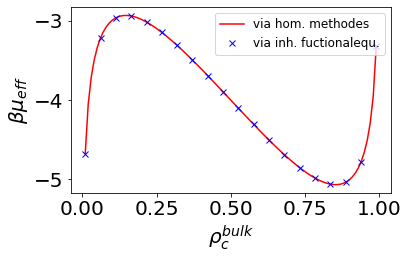

In [11]:
plt.plot(rho, mu, 'r', label=r'via hom. methodes')
plt.plot(rho_inh, mu_inh, 'bx', label=r'via inh. fuctionalequ.')
plt.xlabel(r'$\rho_c^{bulk}$')
plt.ylabel(r'$\beta\mu_{eff}$')
plt.legend()

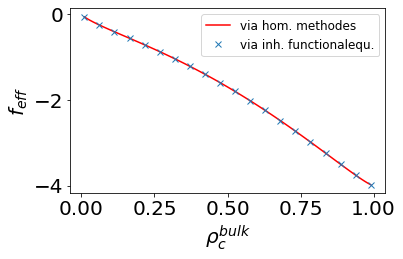

In [12]:
plt.plot(rho, f, 'r',label='via hom. methodes')
plt.plot(rho_inh, f_inh, 'x', label='via inh. functionalequ.')
plt.xlabel(r'$\rho_c^{bulk}$')
plt.ylabel(r'$f_{eff}$')
plt.legend()

### 2) Unter fixiertem chemischen Potential:

Parameter unter denen der Test stattfinden soll:

In [13]:
# Ising- Modell Parameter
beta=0.5
J=1
gamma=4 #Anzahl nächster Nachbarn
h=0.25

# Umrechnen in Parameter des Gittergases
mu = -2*beta*(J*gamma-h)
epsi = 4*J #Das ist die Wechselwirkungsstärke in Einheiten Energie
epsi = beta*epsi #Bei uns werden allerdings alle Größen mit Einheit Energie mit beta multipliziert

(1) Berechne die Koexistenzdichten unter verwendung der homogenen Methoden

In [14]:
coex_dens = Model.cal_bulk_coex_dens(mu, epsi)
print('rho_coex='+str(coex_dens))

rho_coex=(0.028748063457822746, 0.9840532687060134)


(2) Berechne die Koexistenzdichten unter Verwendung der inhomogenen Funktionalgleichungen mittels Picard-Iteration

In [15]:
hom = Model((5,5), epsi=epsi, mu=mu, mu_fix=True)
#Berechne koexisterende Flüssigdichte:
hom.create_init_profile([0.6], [(0,0)])
hom.make_picard_iteration(0.02, 10000, 1000)
r_l = hom.dens
print('rho_liqu='+str(r_l))
#Berechne koexistierende Gasphase:
hom.create_init_profile([0.2], [(0,0)])
hom.make_picard_iteration(0.02, 10000, 1000)
r_g = hom.dens
print('rho_gas='+str(r_g))

checkpoint at:       1000, Error: 7.703719777548943e-30
checkpoint at:       2000, Error: 7.703719777548943e-30
checkpoint at:       3000, Error: 7.703719777548943e-30
checkpoint at:       4000, Error: 7.703719777548943e-30
checkpoint at:       5000, Error: 7.703719777548943e-30
checkpoint at:       6000, Error: 7.703719777548943e-30
checkpoint at:       7000, Error: 7.703719777548943e-30
checkpoint at:       8000, Error: 7.703719777548943e-30
checkpoint at:       9000, Error: 7.703719777548943e-30
checkpoint at:      10000, Error: 7.703719777548943e-30
rho_liqu=0.98405326857824
checkpoint at:       1000, Error: 7.247580467438816e-15
checkpoint at:       2000, Error: 6.99124606874719e-29
checkpoint at:       3000, Error: 1.4745401136714774e-32
checkpoint at:       4000, Error: 1.4745401136714774e-32
checkpoint at:       5000, Error: 1.4745401136714774e-32
checkpoint at:       6000, Error: 1.4745401136714774e-32
checkpoint at:       7000, Error: 1.4745401136714774e-32
checkpoint at:    

# Teste nun die inhomogenen Eigenschaften der Funktionalgleichungen
## Mache eine Picard-Iteration unterhalb des kritischen Punktes

Wähle Systemparameter unterhalb des kritischen Punktes (Vgl. Phasendiagramm aus Notebook GG-2Dhom.jpynb)

/home/manuel/miniconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


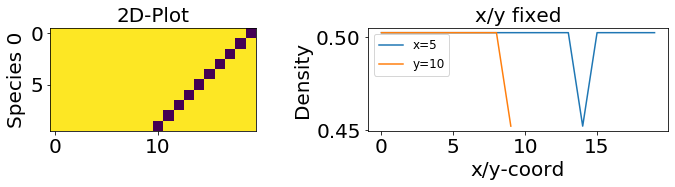

In [16]:
epsi=1.6
dens = 0.5
size = (10,20)
model = Model(size, epsi=epsi, dens=dens, bound_cond='11_if')
model.create_init_profile([dens], [(10,1)])
fig=model.print_2d_profile2()
fig.show()

In [17]:
model.make_picard_iteration(0.02, 30000, 'dec2')

checkpoint at:         20, Error: 0.017242037005421526
checkpoint at:         40, Error: 0.015643203039461893
checkpoint at:         60, Error:  0.03071048016325451
checkpoint at:         80, Error:  0.06460010157777146
checkpoint at:        100, Error:  0.13655637463568648
checkpoint at:        300, Error:  0.45512423021386417
checkpoint at:        500, Error: 0.0015379814152207407
checkpoint at:        700, Error: 6.145891954697422e-06
checkpoint at:        900, Error: 2.6595358245214618e-08
checkpoint at:       1100, Error: 1.1854896686416593e-10
checkpoint at:       3100, Error: 1.3485255544452484e-27
checkpoint at:       5100, Error: 1.3485255544452484e-27
checkpoint at:       7100, Error: 1.3485255544452484e-27
checkpoint at:       9100, Error: 1.3485255544452484e-27
checkpoint at:      11100, Error: 1.3485255544452484e-27


This is a Lattice gas described with mean fieldDFT. It is an object of the Type 'LG2dMF' and hasthe following properties:

Attr. strength 'epsi'                   : 1.6

It inherits from 'LdftModel', with thefollowing properties:
This is a LdftModel with the following properties:

Systemsize                              : (10, 20)
mu_fix                                  : [False]
Chem. pot. 'mu'                         : [-3.1999999999999953]
Density                                 : [0.5]
External potential 'V_ext'              : off
Curent dens prof                        : <class 'list'>
History                                 : len=17
                                        : last entry=30000
Error history                           : len=30000
                                        : last value=[1.3485255544452484e-27]
Boundary Condition                      : 11_if



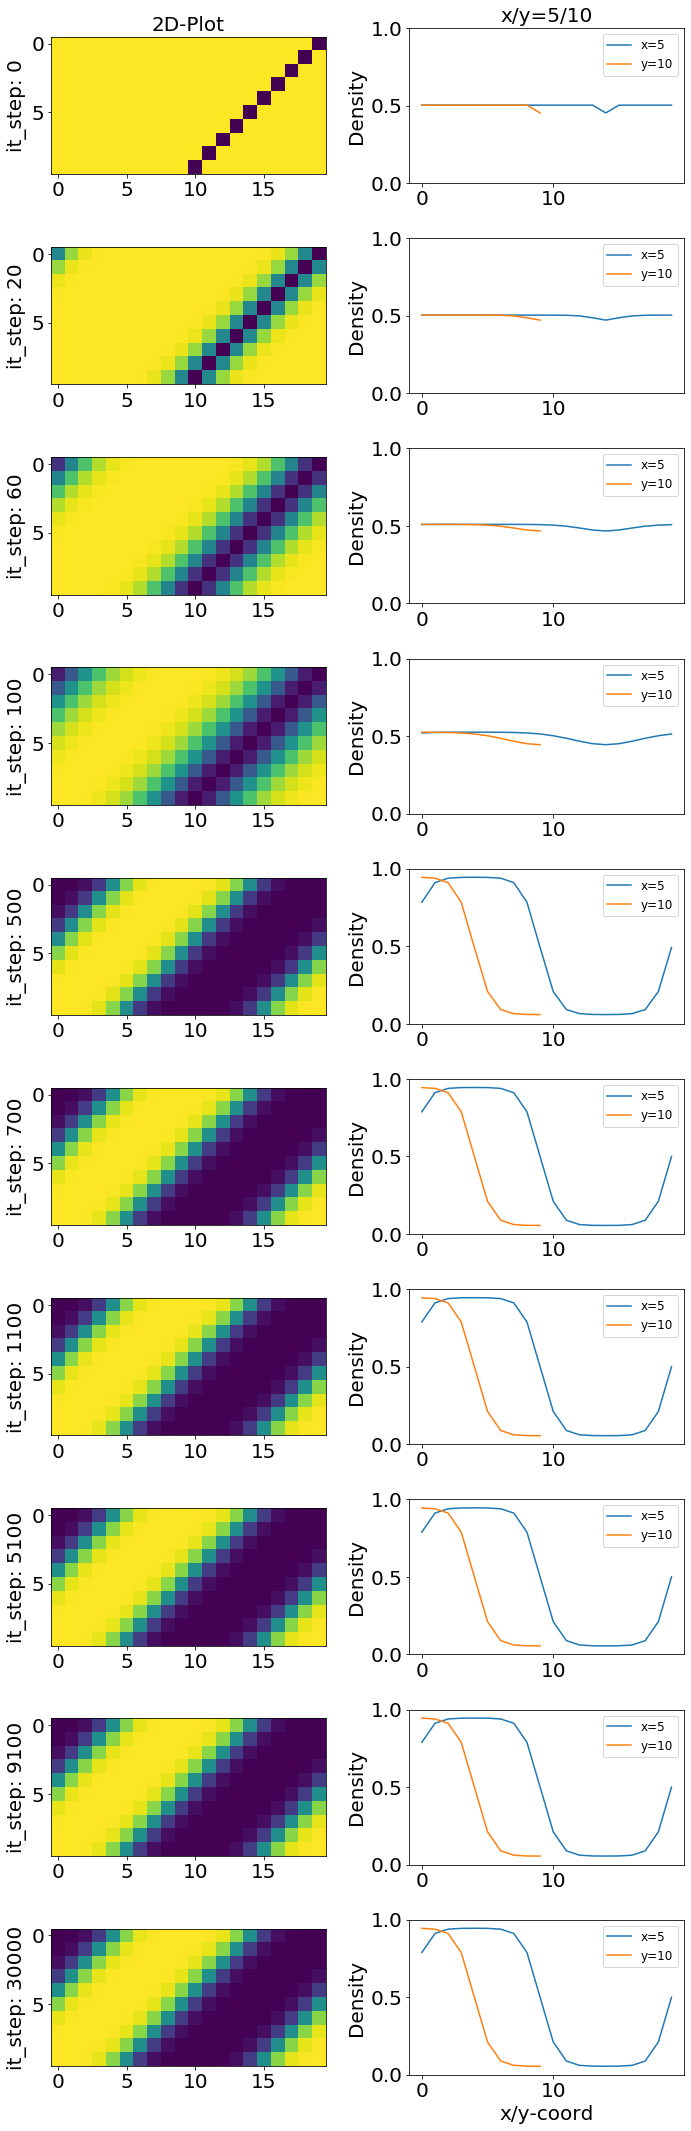

In [18]:
print(model)
fig =model.print_2d_hist2()

In [19]:
model.make_picard_iteration(0.02, 10000, 'dec1')

checkpoint at:      40000, Error: 1.3485255544452484e-27


This is a Lattice gas described with mean fieldDFT. It is an object of the Type 'LG2dMF' and hasthe following properties:

Attr. strength 'epsi'                   : 1.6

It inherits from 'LdftModel', with thefollowing properties:
This is a LdftModel with the following properties:

Systemsize                              : (10, 20)
mu_fix                                  : [False]
Chem. pot. 'mu'                         : [-3.1999999999999953]
Density                                 : [0.5]
External potential 'V_ext'              : off
Curent dens prof                        : <class 'list'>
History                                 : len=18
                                        : last entry=40000
Error history                           : len=40000
                                        : last value=[1.3485255544452484e-27]
Boundary Condition                      : 11_if



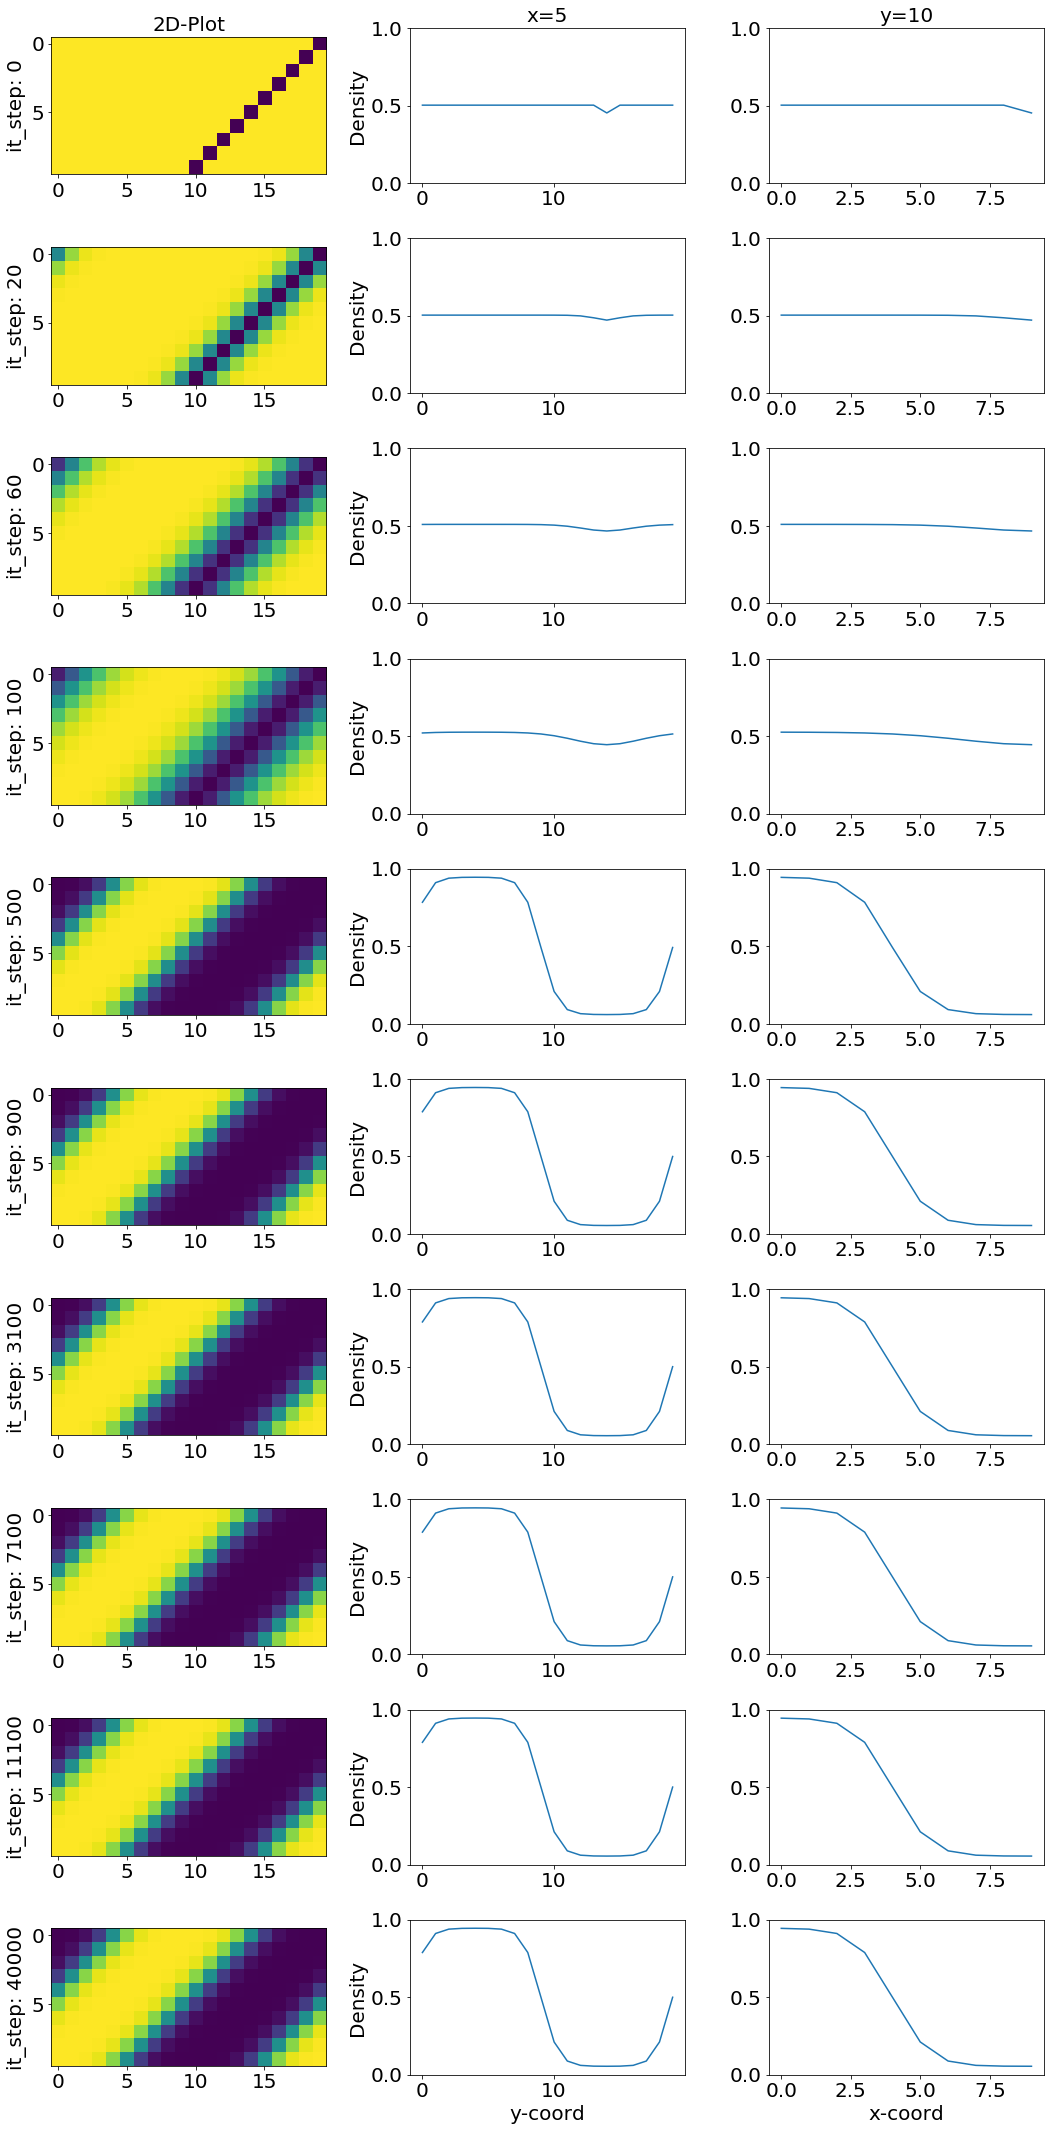

In [20]:
print(model)
fig=model.print_2d_hist()

## Lade ein vorhandenes Dichteprofiel

In [4]:
directory = "../samples/2d-mf/size=64/epsi=1,2"
file = 'dens=0,31.pkl'
print(path.exists(directory))
model = Model.load_syst(directory, file)

True


This is a Lattice gas described with mean fieldDFT. It is an object of the Type 'LG2dMF' and hasthe following properties:

Attr. strength 'epsi'                   : 1.2

It inherits from 'LdftModel', with thefollowing properties:
This is a LdftModel with the following properties:

System size                             : (64, 64)
mu_fix                                  : [False]
Chem. pot. 'mu'                         : [-2.3900352710416106]
Density                                 : [0.31]
External potential 'V_ext'              : off
Current dens prof                       : <class 'list'>
History                                 : len=18
                                        : last entry=35731
Error history                           : len=35731
                                        : last value=[9.994645853304289e-21]
Boundary Condition                      : periodic



<bound method Figure.show of <Figure size 1080x216 with 3 Axes>>

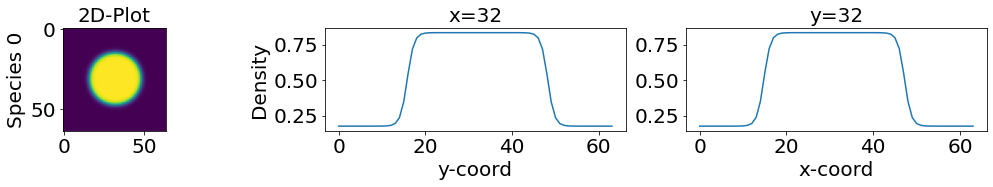

In [5]:
print(model)
fig=model.print_2d_profile()
fig.show

<ipython-input-6-2d2b9cc8637c>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


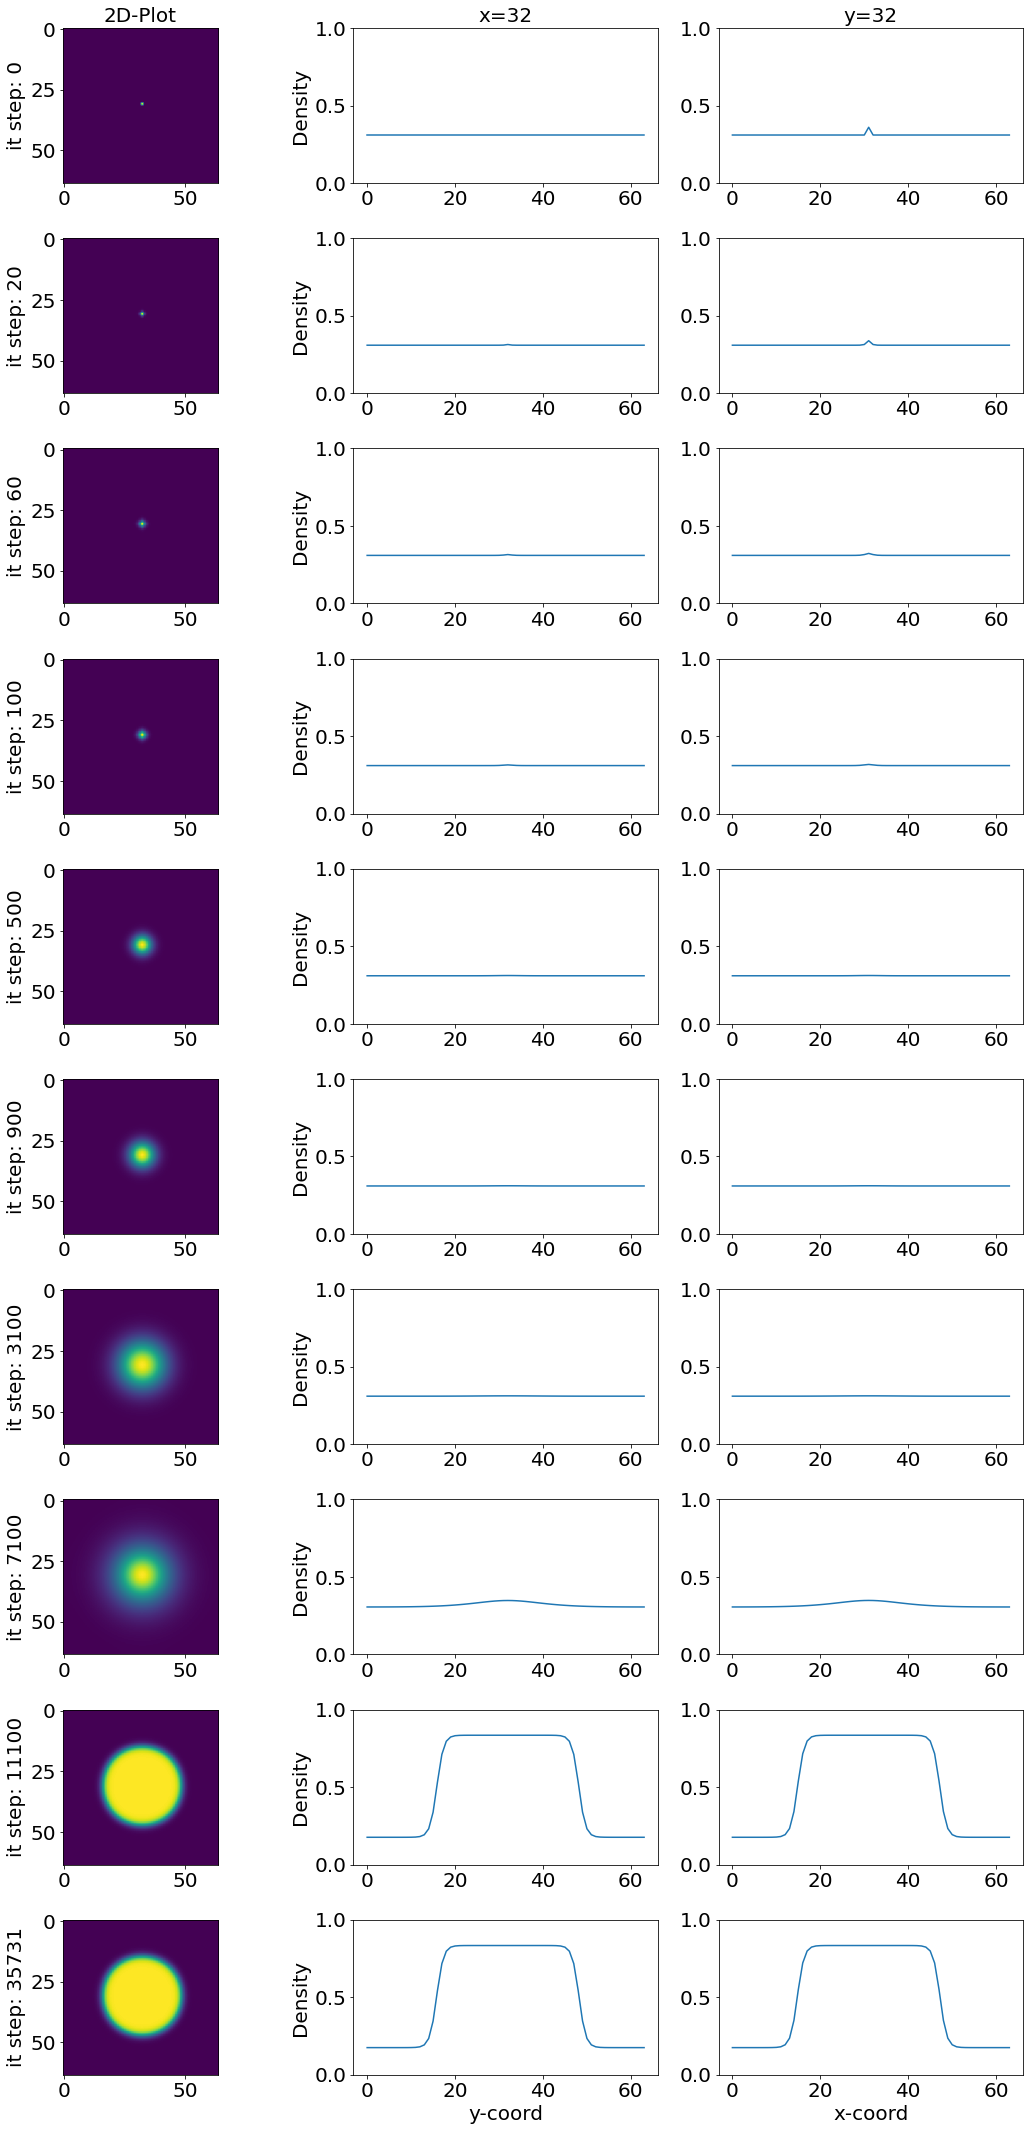

In [6]:
fig=model.print_2d_hist()
fig.show()

In [7]:
prop={}
prop['F'] = model.cal_F()
prop['p_l'] = model.cal_p_liq()
prop['p_v'] = model.cal_p_vap()
prop['gamma_R'] = model.cal_gamma_R(4)
prop['gamma_s'] = model.cal_gamma_s()
prop['gamma_em'] = model.cal_gamma_em()
prop['gamma_inf'] = model.cal_gamma_inf(64)
prop['R_em'] = model.cal_R_em()
prop['ads. at S.O.T.'] = model.cal_adsorptionAtSurfOfTens()
prop['del_Om'] = model.cal_del_Om()
for key, value in prop.items():
    print(key+"="+str(value)+"\n")

F=-3516.6353114232616

p_l=0.12553187409073696

p_v=0.11897034178778704

gamma_R=0.22950989833073251

gamma_s=0.10657689053142969

gamma_em=0.10657862797636622

gamma_inf=0.04248745544771815

R_em=16.335694713496004

ads. at S.O.T.=(6.266596120967165, 0.06140363242139378)

del_Om=5.438394297307923



## Führe Pic.-Iteration durch und vergleiche Dichteprofiel mit gespeichertem sample

Lade gespeichertes Profiel

True
This is a Lattice gas described with mean fieldDFT. It is an object of the Type 'LG2dMF' and hasthe following properties:

Attr. strength 'epsi'                   : 1.2

It inherits from 'LdftModel', with thefollowing properties:
This is a LdftModel with the following properties:

System size                             : (64, 64)
mu_fix                                  : [False]
Chem. pot. 'mu'                         : [-2.3900352710416106]
Density                                 : [0.31]
External potential 'V_ext'              : off
Current dens prof                       : <class 'list'>
History                                 : len=18
                                        : last entry=35731
Error history                           : len=35731
                                        : last value=[9.994645853304289e-21]
Boundary Condition                      : periodic

[0, 20, 40, 60, 80, 100, 300, 500, 700, 900, 1100, 3100, 5100, 7100, 9100, 11100, 31100, 35731]
0.000937705

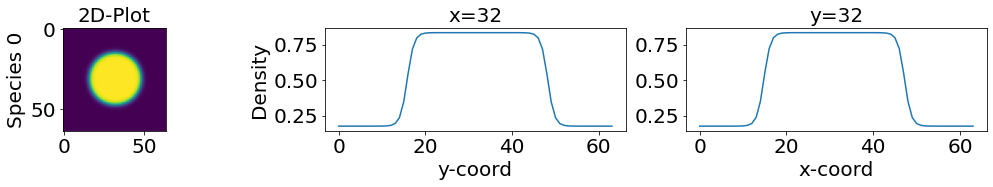

In [10]:
directory = "../samples/2d-mf/size=64/epsi=1,2"
file = 'dens=0,31.pkl'
print(path.exists(directory))
model = Model.load_syst(directory, file)
print(model)
print(model.it_hist)
print(model.err_hist[7100])
fig = model.print_2d_profile()

Erstelle neues System und übernehme initiales Dichteprofiel für die Pic-It

In [11]:
newModel = Model(model.size, epsi=model.epsi, dens=model.dens, r=model.r_hist[0])
print(newModel)

This is a Lattice gas described with mean fieldDFT. It is an object of the Type 'LG2dMF' and hasthe following properties:

Attr. strength 'epsi'                   : 1.2

It inherits from 'LdftModel', with thefollowing properties:
This is a LdftModel with the following properties:

System size                             : (64, 64)
mu_fix                                  : [False]
Chem. pot. 'mu'                         : [None]
Density                                 : [0.31]
External potential 'V_ext'              : off
Current dens prof                       : <class 'list'>
History                                 : len=1
                                        : last entry=0
Error history                           : len=0
                                        : last value=---
Boundary Condition                      : periodic



In [28]:
newModel.make_picard_iteration(0.01, 36000, 'dec2')

checkpoint at:         20, Error: 0.0031162942788986875
checkpoint at:         40, Error: 0.0014704839958207929
checkpoint at:         60, Error: 0.0007369752235346604
checkpoint at:         80, Error: 0.0003917932805726478
checkpoint at:        100, Error: 0.00022028785587660624
checkpoint at:        300, Error: 6.36628067840281e-06
checkpoint at:        500, Error: 1.2497913490168235e-06
checkpoint at:        700, Error: 4.5149669515477305e-07
checkpoint at:        900, Error: 2.1948927509257716e-07
checkpoint at:       1100, Error: 1.293937359101023e-07
checkpoint at:       3100, Error: 7.247203897676968e-08
checkpoint at:       5100, Error: 2.5051953657262853e-07
checkpoint at:       7100, Error: 9.905897106324463e-07
checkpoint at:       9100, Error: 4.333455878450375e-06
checkpoint at:      11100, Error: 2.252529231469257e-05
checkpoint at:      31100, Error: 1.4438294370015206e-10


Resultate aus aktueller Iteration nach 7100 Schritten
vapour dens         : 0.1752648788021297
liquid dens         : 0.8335524933638574


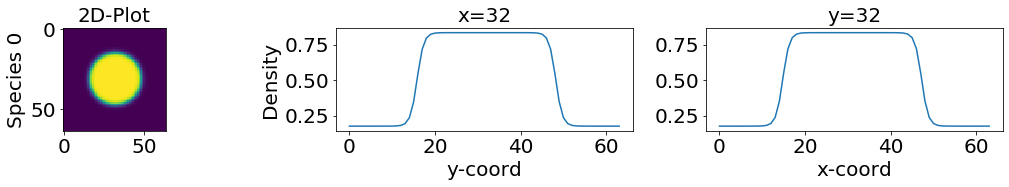

In [29]:
print('Resultate aus aktueller Iteration nach 7100 Schritten')
model.print_2d_profile()
print('{0:<20}: {1}'.format('vapour dens', np.min(newModel.r_hist[-1])))
print('{0:<20}: {1}'.format('liquid dens', np.max(newModel.r_hist[-1])))

Resultate aus vergangener Profiel berechnung nach 7100 Pic.-Schritten
vapour dens         : 0.17526487598135776
liquid dens         : 0.8335524912505742


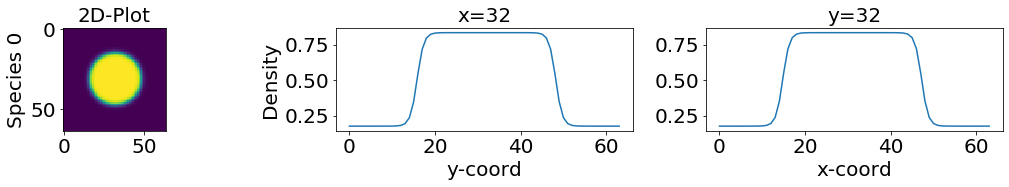

In [30]:
print('Resultate aus vergangener Profiel berechnung nach 7100 Pic.-Schritten')
model.print_2d_profile()
print('{0:<20}: {1}'.format('vapour dens', np.min(model._r_hist[-1])))
print('{0:<20}: {1}'.format('liquid dens', np.max(model._r_hist[-1])))